In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
df = pd.read_csv("./kbopitchingdata.csv")

columns_to_keep = [
    'ERA', 'WHIP', 'strikeouts', 'complete_game', 'shutouts', 'saves',
    'innings_pitched', 'hits', 'runs', 'earned_runs', 'home_runs', 'walks', 'win_loss_percentage'
]

df = df[columns_to_keep]
df

,ERA,WHIP,strikeouts,complete_game,shutouts,saves,innings_pitched,hits,runs,earned_runs,home_runs,walks,win_loss_percentage
0,3.57,1.312,1062,0,18,32,1264.1,1117,557,501,79,542,0.558
1,3.67,1.316,1051,2,6,33,1255.0,1166,581,512,85,486,0.560
2,4.28,1.487,1037,2,10,27,1260.1,1288,653,599,104,586,0.519
3,4.29,1.450,1031,2,14,46,1250.0,1287,653,596,129,526,0.560
4,4.50,1.476,1046,3,10,33,1247.2,1256,686,624,122,585,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,3.19,1.260,318,32,4,10,725.1,625,318,257,41,289,0.700
319,3.51,1.298,394,19,8,15,708.1,660,350,276,52,259,0.582
320,3.95,1.435,363,26,4,4,713.2,763,385,313,69,261,0.388
321,3.76,1.403,348,24,2,3,707.9,698,388,296,50,295,0.475


In [3]:
# Summarize each column
df.describe()

,ERA,WHIP,strikeouts,complete_game,shutouts,saves,innings_pitched,hits,runs,earned_runs,home_runs,walks,win_loss_percentage
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,4.207833,1.400588,762.609907,10.823529,6.309598,28.798762,1137.173065,1149.000000,596.346749,536.275542,106.715170,448.959752,0.500043
std,0.750075,0.115192,206.319423,12.022616,3.472626,9.402312,114.090785,177.545865,131.061590,127.222997,36.760506,83.547481,0.087081
min,2.540000,1.106000,175.000000,0.000000,0.000000,3.000000,692.000000,618.000000,257.000000,211.000000,38.000000,187.000000,0.188000
25%,3.630000,1.314000,639.000000,2.000000,4.000000,24.000000,1108.100000,1035.500000,506.000000,446.500000,78.000000,395.000000,0.444500
50%,4.220000,1.402000,793.000000,4.000000,6.000000,30.000000,1135.200000,1139.000000,582.000000,529.000000,101.000000,446.000000,0.504000
75%,4.700000,1.478000,911.500000,20.000000,8.500000,36.000000,1193.150000,1275.000000,694.500000,629.000000,132.500000,512.000000,0.561500
max,6.350000,1.761000,1194.000000,56.000000,19.000000,52.000000,1296.200000,1593.000000,927.000000,838.000000,194.000000,670.000000,0.706000


In [4]:
# Replace "?" values with NaN so we can use dropna and drop NaN values
df.replace("?", np.nan, inplace = True)
df.dropna(inplace = True)

In [5]:
# X and Y axes
X = df.drop(columns = ['win_loss_percentage'])
Y = df['win_loss_percentage'].apply(lambda x: 1 if x >= 0.5 else 0)

In [6]:
from sklearn.preprocessing import StandardScaler
# Use Standard Scaler instead of Min Max Scaler
scaler = StandardScaler()

# Fit data
X_scaled = scaler.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split

# Train and tests
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size = 0.3, random_state = 42)

print(Y_train.head())
Y_test.head()

206    1
81     0
147    0
39     0
222    0
Name: win_loss_percentage, dtype: int64


173    0
132    0
197    1
9      0
104    1
Name: win_loss_percentage, dtype: int64

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, Y_train)

SGDClassifier(random_state=42)

In [9]:
# Predict the data
Y_pred_sgd = sgd_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.67      0.78      0.72        45
           1       0.78      0.67      0.72        52

    accuracy                           0.72        97
   macro avg       0.73      0.73      0.72        97
weighted avg       0.73      0.72      0.72        97



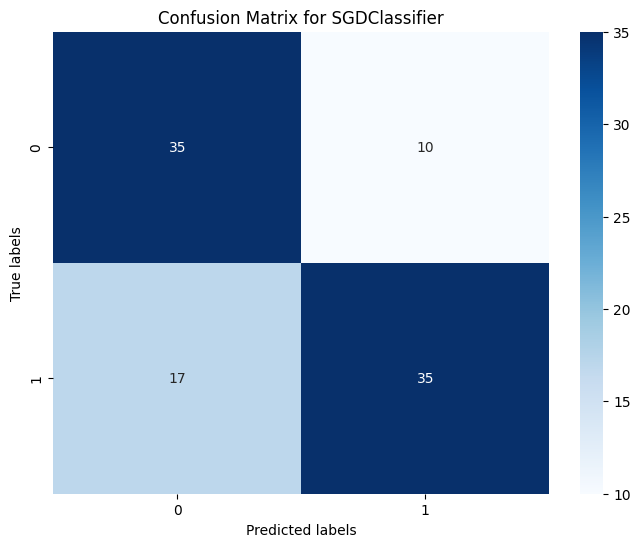

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(Y_test, Y_pred_sgd))
cm = confusion_matrix(Y_test, Y_pred_sgd)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title(f'Confusion Matrix for SGDClassifier')
plt.show()
print()

In [11]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(X_train, Y_train)

LogisticRegression(random_state=42)

              precision    recall  f1-score   support

           0       0.66      0.73      0.69        45
           1       0.74      0.67      0.71        52

    accuracy                           0.70        97
   macro avg       0.70      0.70      0.70        97
weighted avg       0.71      0.70      0.70        97



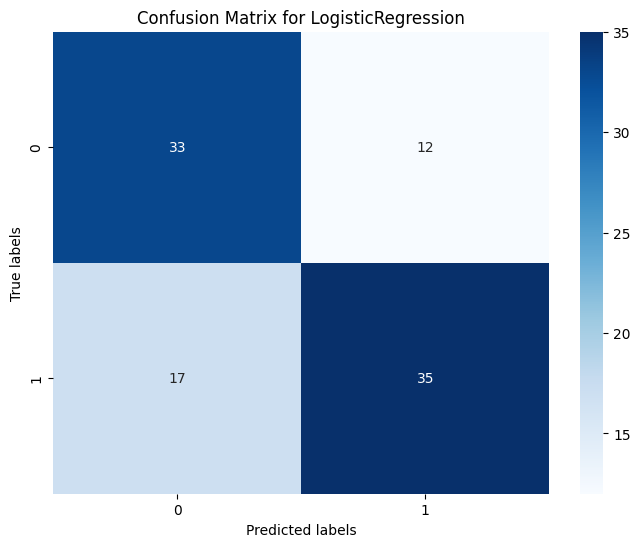

In [12]:
# Predict the data
Y_pred_lr = lr_clf.predict(X_test)
print(classification_report(Y_test, Y_pred_lr))

cm = confusion_matrix(Y_test, Y_pred_lr)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title(f'Confusion Matrix for LogisticRegression')
plt.show()
print()

In [13]:
from sklearn.linear_model import Perceptron

perceptron_clf = Perceptron(random_state=42)
perceptron_clf.fit(X_train, Y_train)

Perceptron(random_state=42)

              precision    recall  f1-score   support

           0       0.67      0.76      0.71        45
           1       0.76      0.67      0.71        52

    accuracy                           0.71        97
   macro avg       0.71      0.71      0.71        97
weighted avg       0.72      0.71      0.71        97



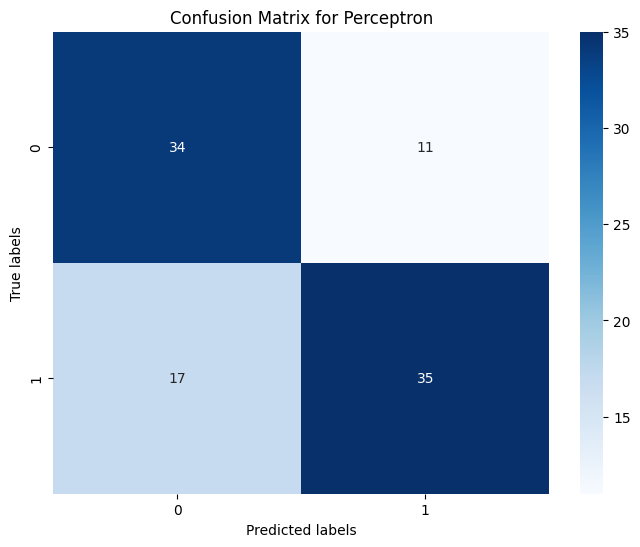

In [14]:
# Predict the data
Y_pred_perceptron = perceptron_clf.predict(X_test)
print(classification_report(Y_test, Y_pred_perceptron))

cm = confusion_matrix(Y_test, Y_pred_perceptron)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title(f'Confusion Matrix for Perceptron')
plt.show()
print()

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best parameters for SGDClassifier: {'alpha': 0.001, 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'modified_huber', 'max_iter': 1000, 'penalty': 'l1'}
Best score: 0.7788405797101449
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        45
           1       0.77      0.71      0.74        52

    accuracy                           0.73        97
   macro avg       0.73      0.73      0.73        97
weighted avg       0.74      0.73      0.73        97



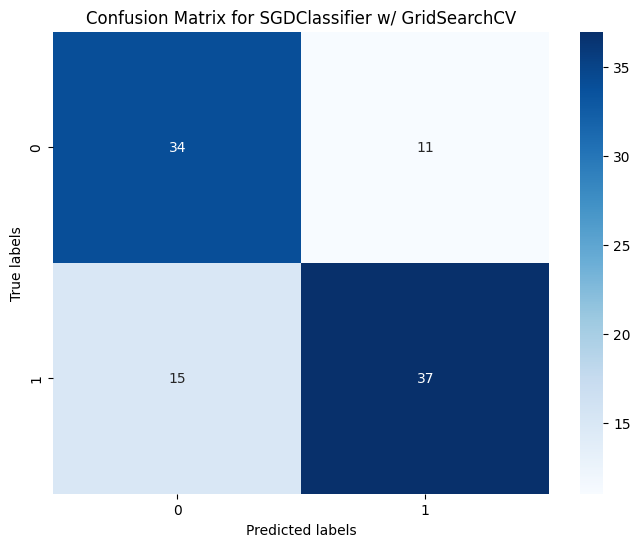

In [15]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

# Parameter grid for SGDClassifier
param_grid_sgd = {
    'loss': ['hinge', 'log', 'modified_huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 5000, 10000],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'eta0': [0.01, 0.1]
}

# Grid search
grid_sgd = GridSearchCV(SGDClassifier(random_state=42), param_grid_sgd, cv=5, verbose=1, n_jobs=-1)
grid_sgd.fit(X_train, Y_train)

# Best parameters and model
print("Best parameters for SGDClassifier:", grid_sgd.best_params_)
print("Best score:", grid_sgd.best_score_)

Y_pred_sgd = grid_sgd.best_estimator_.predict(X_test)
print(classification_report(Y_test, Y_pred_sgd))

cm = confusion_matrix(Y_test, Y_pred_sgd)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title(f'Confusion Matrix for SGDClassifier w/ GridSearchCV')
plt.show()
print()

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters for LogisticRegression: {'C': 0.01, 'max_iter': 1000, 'penalty': None, 'solver': 'sag'}
Best score: 0.7964251207729468
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        45
           1       0.80      0.71      0.76        52

    accuracy                           0.75        97
   macro avg       0.76      0.76      0.75        97
weighted avg       0.76      0.75      0.75        97



c:\Users\Arjun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Arjun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


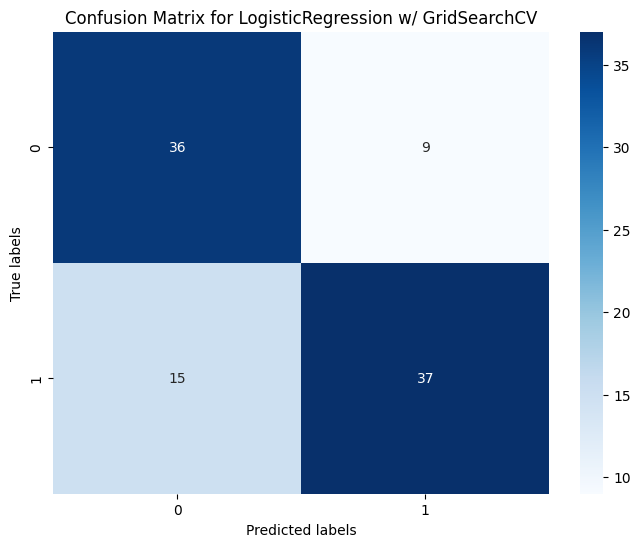

In [16]:
# Parameter grid for LogisticRegression
param_grid_lr = {
    'penalty': ['l2', None],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'sag'],
    'max_iter': [100, 1000, 2000]
}

# Grid search
grid_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, verbose=1, n_jobs=-1)
grid_lr.fit(X_train, Y_train)

# Best parameters and model
print("Best parameters for LogisticRegression:", grid_lr.best_params_)
print("Best score:", grid_lr.best_score_)

Y_pred_lr = grid_lr.best_estimator_.predict(X_test)
print(classification_report(Y_test, Y_pred_lr))

cm = confusion_matrix(Y_test, Y_pred_lr)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title(f'Confusion Matrix for LogisticRegression w/ GridSearchCV')
plt.show()
print()

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Perceptron: {'alpha': 0.001, 'early_stopping': True, 'eta0': 0.01, 'max_iter': 1000, 'penalty': 'l1'}
Best score: 0.7435748792270531
              precision    recall  f1-score   support

           0       0.68      0.76      0.72        45
           1       0.77      0.69      0.73        52

    accuracy                           0.72        97
   macro avg       0.72      0.72      0.72        97
weighted avg       0.73      0.72      0.72        97



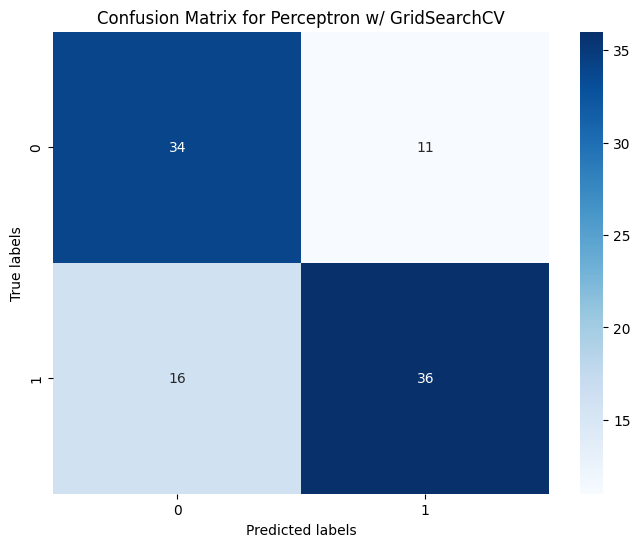

In [17]:
# Parameter grid for Perceptron
param_grid_perc = {
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 5000, 10000],
    'eta0': [0.01, 0.1],
    'early_stopping': [True, False]
}

# Grid search
grid_perc = GridSearchCV(Perceptron(random_state=42), param_grid_perc, cv=5, verbose=1, n_jobs=-1)
grid_perc.fit(X_train, Y_train)

# Best parameters and model
print("Best parameters for Perceptron:", grid_perc.best_params_)
print("Best score:", grid_perc.best_score_)

Y_pred_perc = grid_perc.best_estimator_.predict(X_test)
print(classification_report(Y_test, Y_pred_perc))

cm = confusion_matrix(Y_test, Y_pred_perc)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title(f'Confusion Matrix for Perceptron w/ GridSearchCV')
plt.show()
print()